In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import scipy.stats as stats

import scipy

import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GroupKFold, StratifiedGroupKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, scale
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.dummy import DummyClassifier



In [19]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

# Task 2 

Student : Clara Louise Brodt (s224189)

Education : Artificial Intelligence and Data

Date       : 21 June, 2024

Course: (02445) Project in Statistical Evaluation of Artificial
Intelligence

_____________
## DATA COLLECTION

____________

In [20]:
df = pd.read_csv('/Users/claralouisebrodt/Library/CloudStorage/OneDrive-DanmarksTekniskeUniversitet/DTU/2. semester/Project in Statistical Evaluation for Artificial Intelligens/Individual assignment/HR_data.csv')

In [21]:
X = pd.DataFrame(df, columns=['HR_Mean', 'HR_Median','HR_std','HR_Min','HR_Max','HR_AUC','Round','Phase','Puzzler','Cohort'])
y = pd.DataFrame(df, columns=['Frustrated'])
groups = df['Individual']


label = LabelEncoder()
scaler = StandardScaler()

X[['HR_Mean', 'HR_Median', 'HR_std', 'HR_Min', 'HR_Max', 'HR_AUC']] = scaler.fit_transform(X[['HR_Mean', 'HR_Median', 'HR_std', 'HR_Min', 'HR_Max', 'HR_AUC']])

X['Round'] = label.fit_transform(X['Round'])
X['Phase'] = label.fit_transform(X['Phase'])
X['Cohort'] = label.fit_transform(X['Cohort'])

X = X.to_numpy()
y = y.to_numpy()

binary = True

if binary == True:
    y = df['Frustrated'].apply(lambda x: 0 if 0 <= x <= 3 else 1).to_numpy()


gkf = GroupKFold(n_splits=7)

_____________
## AI MODELS

_____________

## Model 1 : Logistic Regression model

In [23]:
model = LogisticRegression()
print("MODEL : Logistic Regression")


accuracy_lr = []
precision_lr = []
recall_lr = []
f1_lr = []
roc_auc_lr = []

for i, (train_index, test_index) in enumerate(gkf.split(X, y, groups)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    accuracy_lr.append(accuracy)
    precision_lr.append(precision)
    recall_lr.append(recall)
    f1_lr.append(f1)
    roc_auc_lr.append(roc_auc)
    
    mse = mean_squared_error(y_test, y_pred)
    
    print("---------------------------------------------------------------------------------------------------------------")
    print(f'| Fold : {i+1} | Accuracy : {accuracy * 100:.2f}%  | Precision : {precision:.4f} | Recall : {recall:.4f} | F1-Score : {f1:.4f} | ROC-AUC : {roc_auc:.4f} |')

print("---------------------------------------------------------------------------------------------------------------")
print(f'| Average Accuracy  : {np.mean(accuracy_lr) * 100:.2f}% |')
print(f'| Average Precision : {np.mean(precision_lr):.4f} |')
print(f'| Average Recall    : {np.mean(recall_lr):.4f} |')
print(f'| Average F1-Score  : {np.mean(f1_lr):.4f} |')
print(f'| Average ROC-AUC   : {np.mean(roc_auc_lr):.4f} |')


MODEL : Logistic Regression
---------------------------------------------------------------------------------------------------------------
| Fold : 1 | Accuracy : 58.33%  | Precision : 0.0000 | Recall : 0.0000 | F1-Score : 0.0000 | ROC-AUC : 0.6143 |
---------------------------------------------------------------------------------------------------------------
| Fold : 2 | Accuracy : 75.00%  | Precision : 0.0000 | Recall : 0.0000 | F1-Score : 0.0000 | ROC-AUC : 0.4722 |
---------------------------------------------------------------------------------------------------------------
| Fold : 3 | Accuracy : 62.50%  | Precision : 0.0000 | Recall : 0.0000 | F1-Score : 0.0000 | ROC-AUC : 0.5234 |
---------------------------------------------------------------------------------------------------------------
| Fold : 4 | Accuracy : 79.17%  | Precision : 0.0000 | Recall : 0.0000 | F1-Score : 0.0000 | ROC-AUC : 0.7474 |
----------------------------------------------------------------------------

## Decision Tree

In [24]:
model = DecisionTreeRegressor()
print("MODEL : Decision Tree Regressor")


accuracy_dt = []
precision_dt = []
recall_dt = []
f1_dt = []
roc_auc_dt = []

for i, (train_index, test_index) in enumerate(gkf.split(X, y, groups)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model.fit(X_train, y_train)
        
    y_pred = model.predict(X_test)
    y_pred_class = np.where(y_pred >= 0.5, 1, 0)
    
    accuracy = accuracy_score(y_test, y_pred_class)
    precision = precision_score(y_test, y_pred_class)
    recall = recall_score(y_test, y_pred_class)
    f1 = f1_score(y_test, y_pred_class)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    accuracy_dt.append(accuracy)
    precision_dt.append(precision)
    recall_dt.append(recall)
    f1_dt.append(f1)
    roc_auc_dt.append(roc_auc)
    
    mse = mean_squared_error(y_test, y_pred)
    
    print("---------------------------------------------------------------------------------------------------------------")
    print(f'| Fold : {i+1} | Accuracy : {accuracy * 100:.2f}%  | Precision : {precision:.4f} | Recall : {recall:.4f} | F1-Score : {f1:.4f} | ROC-AUC : {roc_auc:.4f} |')

print("---------------------------------------------------------------------------------------------------------------")
print(f'| Average Accuracy  : {np.mean(accuracy_dt) * 100:.2f}% |')
print(f'| Average Precision : {np.mean(precision_dt):.4f} |')
print(f'| Average Recall    : {np.mean(recall_dt):.4f} |')
print(f'| Average F1-Score  : {np.mean(f1_dt):.4f} |')
print(f'| Average ROC-AUC   : {np.mean(roc_auc_dt):.4f} |')
    

MODEL : Decision Tree Regressor
---------------------------------------------------------------------------------------------------------------
| Fold : 1 | Accuracy : 70.83%  | Precision : 0.6667 | Recall : 0.6000 | F1-Score : 0.6316 | ROC-AUC : 0.6929 |
---------------------------------------------------------------------------------------------------------------
| Fold : 2 | Accuracy : 66.67%  | Precision : 0.3750 | Recall : 0.5000 | F1-Score : 0.4286 | ROC-AUC : 0.6111 |
---------------------------------------------------------------------------------------------------------------
| Fold : 3 | Accuracy : 66.67%  | Precision : 0.5000 | Recall : 0.3750 | F1-Score : 0.4286 | ROC-AUC : 0.5938 |
---------------------------------------------------------------------------------------------------------------
| Fold : 4 | Accuracy : 79.17%  | Precision : 0.5000 | Recall : 0.4000 | F1-Score : 0.4444 | ROC-AUC : 0.6474 |
------------------------------------------------------------------------

## Random Forest

In [25]:
model = RandomForestClassifier()
print("MODEL : Random Forest Classifier")

accuracy_rf = []
precision_rf = []
recall_rf = []
f1_rf = []
roc_auc_rf = []

for i, (train_index, test_index) in enumerate(gkf.split(X, y, groups)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    accuracy_rf.append(accuracy)
    precision_rf.append(precision)
    recall_rf.append(recall)
    f1_rf.append(f1)
    roc_auc_rf.append(roc_auc)
    
    mse = mean_squared_error(y_test, y_pred)
    
    print("---------------------------------------------------------------------------------------------------------------")
    print(f'| Fold : {i+1} | Accuracy : {accuracy * 100:.2f}%  | Precision : {precision:.4f} | Recall : {recall:.4f} | F1-Score : {f1:.4f} | ROC-AUC : {roc_auc:.4f} |')

print("---------------------------------------------------------------------------------------------------------------")
print(f'| Average Accuracy  : {np.mean(accuracy_rf) * 100:.2f}% |')
print(f'| Average Precision : {np.mean(precision_rf):.4f} |')
print(f'| Average Recall    : {np.mean(recall_rf):.4f} |')
print(f'| Average F1-Score  : {np.mean(f1_rf):.4f} |')
print(f'| Average ROC-AUC   : {np.mean(roc_auc_rf):.4f} |')
    

MODEL : Random Forest Classifier
---------------------------------------------------------------------------------------------------------------
| Fold : 1 | Accuracy : 70.83%  | Precision : 1.0000 | Recall : 0.3000 | F1-Score : 0.4615 | ROC-AUC : 0.6643 |
---------------------------------------------------------------------------------------------------------------
| Fold : 2 | Accuracy : 50.00%  | Precision : 0.0000 | Recall : 0.0000 | F1-Score : 0.0000 | ROC-AUC : 0.3704 |
---------------------------------------------------------------------------------------------------------------
| Fold : 3 | Accuracy : 70.83%  | Precision : 0.6000 | Recall : 0.3750 | F1-Score : 0.4615 | ROC-AUC : 0.5859 |
---------------------------------------------------------------------------------------------------------------
| Fold : 4 | Accuracy : 83.33%  | Precision : 0.6667 | Recall : 0.4000 | F1-Score : 0.5000 | ROC-AUC : 0.7421 |
-----------------------------------------------------------------------

_____________
## STATISTICS

_____________

In [26]:
anova_accuracy = stats.f_oneway(accuracy_lr,accuracy_dt,accuracy_rf)
print("------------------------------------------------------------------------------------------")
print(f"| ANOVA on Accuracy  | Statistic = {anova_accuracy[0]} | pvalue = {anova_accuracy[1]}      |")

print("------------------------------------------------------------------------------------------")
anova_recall = stats.f_oneway(recall_lr,recall_dt,recall_rf)
print(f"| ANOVA on Recall    | Statistic = {anova_recall[0]} | pvalue = {anova_recall[1]}  |")

print("------------------------------------------------------------------------------------------")
anova_precision = stats.f_oneway(precision_lr,precision_dt,precision_rf)
print(f"| ANOVA on Precision | Statistic = {anova_precision[0]} | pvalue = {anova_precision[1]}     |")

print("------------------------------------------------------------------------------------------")
anova_roc_auc = stats.f_oneway(roc_auc_lr,roc_auc_dt,roc_auc_rf)
print(f"| ANOVA on ROC_AUC   | Statistic = {anova_roc_auc[0]} | pvalue = {anova_roc_auc[1]}      |")
print("------------------------------------------------------------------------------------------")

------------------------------------------------------------------------------------------
| ANOVA on Accuracy  | Statistic = 0.03383458646616554 | pvalue = 0.9667927331581149      |
------------------------------------------------------------------------------------------
| ANOVA on Recall    | Statistic = 10.837324766355145 | pvalue = 0.0008143941664402153  |
------------------------------------------------------------------------------------------
| ANOVA on Precision | Statistic = 3.80921500833609 | pvalue = 0.04173303265088249     |
------------------------------------------------------------------------------------------
| ANOVA on ROC_AUC   | Statistic = 0.28746612040576863 | pvalue = 0.7535418938341932      |
------------------------------------------------------------------------------------------


In [57]:
print("---------------------------------------------------------------------------------------------------------------------------")
test_recall_lr_dt = scipy.stats.ttest_ind(recall_lr,recall_dt)
print(f"T-test | Recall | Logistic Regression & Decision Tree | Statistic = {round(test_recall_lr_dt[0],4)} | pvalue = {test_recall_lr_dt[1]}")

print("---------------------------------------------------------------------------------------------------------------------------")
test_recall_dt_rf = scipy.stats.ttest_ind(recall_dt,recall_rf)
print(f"T-test | Recall | Decision Tree & Random Forest       | Statistic = {round(test_recall_dt_rf[0],4)} | pvalue = {round(test_recall_dt_rf[1],6)}")

print("---------------------------------------------------------------------------------------------------------------------------")
test_recall_rf_lr = scipy.stats.ttest_ind(recall_rf,recall_lr)
print(f"T-test | Recall | Random Forest & Logistic Regression | Statistic = {round(test_recall_rf_lr[0],4)}  | pvalue = {round(test_recall_rf_lr[1],6)}")




---------------------------------------------------------------------------------------------------------------------------
T-test | Recall | Logistic Regression & Decision Tree | Statistic = -6.0586 | pvalue = 5.683138356153689e-05
---------------------------------------------------------------------------------------------------------------------------
T-test | Recall | Decision Tree & Random Forest       | Statistic = 1.1273 | pvalue = 0.281666
---------------------------------------------------------------------------------------------------------------------------
T-test | Recall | Random Forest & Logistic Regression | Statistic = 3.1516  | pvalue = 0.00835


In [55]:
print("---------------------------------------------------------------------------------------------------------------------------")
test_precision_lr_dt = scipy.stats.ttest_ind(precision_lr,precision_dt)
print(f"T-test | Precision | Logistic Regression & Decision Tree | Statistic = {round(test_precision_lr_dt[0],4)} | pvalue = {round(test_precision_lr_dt[1],4)}")

print("---------------------------------------------------------------------------------------------------------------------------")
test_precision_dt_rf = scipy.stats.ttest_ind(precision_dt,precision_rf)
print(f"T-test | Precision | Decision Tree & Random Forest       | Statistic = {round(test_precision_dt_rf[0],4)} | pvalue = {round(test_precision_dt_rf[1],4)}")

print("---------------------------------------------------------------------------------------------------------------------------")
test_precision_rf_lr = scipy.stats.ttest_ind(precision_rf,precision_lr)
print(f"T-test | Precision | Random Forest & Logistic Regression | Statistic = {round(test_precision_rf_lr[0],4)}  | pvalue = {round(test_precision_rf_lr[1],4)}")


---------------------------------------------------------------------------------------------------------------------------
T-test | Precision | Logistic Regression & Decision Tree | Statistic = -2.1409 | pvalue = 0.0535
---------------------------------------------------------------------------------------------------------------------------
T-test | Precision | Decision Tree & Random Forest       | Statistic = -0.8355 | pvalue = 0.4198
---------------------------------------------------------------------------------------------------------------------------
T-test | Precision | Random Forest & Logistic Regression | Statistic = 2.2313  | pvalue = 0.0455


In [48]:
ci_lr = stats.bootstrap((recall_lr,), np.mean, n_resamples=1000)
ci_dt = stats.bootstrap((recall_dt,), np.mean, n_resamples=1000)
ci_rf = stats.bootstrap((recall_rf,), np.mean, n_resamples=1000)

display(f"| Recall | Logistic Regression : {ci_lr}")
display(f"| Recall | Decision Tree       : {ci_dt}")
display(f"| Recall | Random forest       : {ci_rf}")

'| Recall | Logistic Regression : BootstrapResult(confidence_interval=ConfidenceInterval(low=0.0, high=0.1142857142857143), bootstrap_distribution=array([0.        , 0.        , 0.        , 0.02857143, 0.        ,\n       0.02857143, 0.02857143, 0.        , 0.02857143, 0.02857143,\n       0.        , 0.        , 0.02857143, 0.        , 0.02857143,\n       0.        , 0.        , 0.02857143, 0.        , 0.05714286,\n       0.05714286, 0.        , 0.        , 0.02857143, 0.02857143,\n       0.        , 0.02857143, 0.        , 0.        , 0.05714286,\n       0.        , 0.        , 0.        , 0.02857143, 0.02857143,\n       0.05714286, 0.02857143, 0.02857143, 0.        , 0.02857143,\n       0.        , 0.        , 0.        , 0.        , 0.02857143,\n       0.02857143, 0.08571429, 0.08571429, 0.02857143, 0.05714286,\n       0.05714286, 0.        , 0.05714286, 0.02857143, 0.        ,\n       0.05714286, 0.02857143, 0.05714286, 0.05714286, 0.05714286,\n       0.        , 0.05714286, 0.0285

'| Recall | Decision Tree       : BootstrapResult(confidence_interval=ConfidenceInterval(low=0.37142857142857144, high=0.6258297742247058), bootstrap_distribution=array([0.52857143, 0.42142857, 0.43214286, 0.56428571, 0.48928571,\n       0.525     , 0.43571429, 0.58571429, 0.48214286, 0.47857143,\n       0.39642857, 0.41428571, 0.50357143, 0.47142857, 0.37142857,\n       0.52142857, 0.39285714, 0.43214286, 0.43928571, 0.41785714,\n       0.43928571, 0.52857143, 0.46785714, 0.39285714, 0.6       ,\n       0.46071429, 0.49642857, 0.49642857, 0.43571429, 0.38214286,\n       0.54642857, 0.55      , 0.45      , 0.36071429, 0.48571429,\n       0.52857143, 0.48571429, 0.55      , 0.48928571, 0.54285714,\n       0.52142857, 0.35714286, 0.42857143, 0.47857143, 0.57142857,\n       0.46071429, 0.425     , 0.57142857, 0.41428571, 0.41785714,\n       0.46428571, 0.46428571, 0.39285714, 0.44642857, 0.45357143,\n       0.41071429, 0.54285714, 0.51785714, 0.46785714, 0.45      ,\n       0.43928571, 0.

'| Recall | Random forest       : BootstrapResult(confidence_interval=ConfidenceInterval(low=0.2, high=0.557142857142857), bootstrap_distribution=array([0.33571429, 0.38214286, 0.56785714, 0.34642857, 0.22857143,\n       0.425     , 0.64285714, 0.46071429, 0.50714286, 0.28571429,\n       0.35      , 0.23214286, 0.35357143, 0.20357143, 0.45714286,\n       0.30714286, 0.28928571, 0.25      , 0.325     , 0.23928571,\n       0.4       , 0.33214286, 0.33928571, 0.45714286, 0.34642857,\n       0.375     , 0.51428571, 0.30357143, 0.39642857, 0.37142857,\n       0.36428571, 0.375     , 0.43571429, 0.46071429, 0.31428571,\n       0.23214286, 0.36785714, 0.2       , 0.44285714, 0.39642857,\n       0.36071429, 0.20357143, 0.34285714, 0.33571429, 0.26071429,\n       0.49642857, 0.43928571, 0.53214286, 0.425     , 0.32142857,\n       0.34285714, 0.46071429, 0.50357143, 0.35714286, 0.31785714,\n       0.36785714, 0.37857143, 0.44642857, 0.4       , 0.45      ,\n       0.39642857, 0.36071429, 0.35714

In [58]:
ci_precision_lr = stats.bootstrap((precision_lr,), np.mean, n_resamples=1000)
ci_precision_dt = stats.bootstrap((precision_dt,), np.mean, n_resamples=1000)
ci_precision_rf = stats.bootstrap((precision_rf,), np.mean, n_resamples=1000)

display(f"| Precision | Logistic Regression : {ci_precision_lr}")
display(f"| Precision | Decision Tree       : {ci_precision_dt}")
display(f"| Precision | Random forest       : {ci_precision_rf}")

'| Precision | Logistic Regression : BootstrapResult(confidence_interval=ConfidenceInterval(low=0.0, high=0.5714285714285714), bootstrap_distribution=array([0.14285714, 0.14285714, 0.        , 0.14285714, 0.28571429,\n       0.        , 0.42857143, 0.28571429, 0.        , 0.28571429,\n       0.14285714, 0.        , 0.14285714, 0.        , 0.        ,\n       0.14285714, 0.28571429, 0.        , 0.14285714, 0.14285714,\n       0.14285714, 0.        , 0.14285714, 0.28571429, 0.        ,\n       0.14285714, 0.        , 0.28571429, 0.14285714, 0.14285714,\n       0.28571429, 0.42857143, 0.        , 0.28571429, 0.28571429,\n       0.        , 0.14285714, 0.        , 0.28571429, 0.        ,\n       0.14285714, 0.42857143, 0.        , 0.        , 0.28571429,\n       0.14285714, 0.14285714, 0.14285714, 0.        , 0.14285714,\n       0.14285714, 0.14285714, 0.57142857, 0.28571429, 0.14285714,\n       0.14285714, 0.28571429, 0.42857143, 0.        , 0.14285714,\n       0.        , 0.28571429, 0.4

'| Precision | Decision Tree       : BootstrapResult(confidence_interval=ConfidenceInterval(low=0.39620986750599774, high=0.5583348145814488), bootstrap_distribution=array([0.44318182, 0.43452381, 0.48214286, 0.42532468, 0.43885281,\n       0.43290043, 0.4237013 , 0.48214286, 0.42261905, 0.5       ,\n       0.43290043, 0.46266234, 0.504329  , 0.46103896, 0.50595238,\n       0.42532468, 0.504329  , 0.41774892, 0.41774892, 0.42207792,\n       0.504329  , 0.39123377, 0.43452381, 0.43290043, 0.43452381,\n       0.46861472, 0.51028139, 0.50595238, 0.46699134, 0.46266234,\n       0.48484848, 0.46103896, 0.43722944, 0.42694805, 0.48051948,\n       0.39989177, 0.45833333, 0.44318182, 0.47619048, 0.45670996,\n       0.51028139, 0.48051948, 0.5297619 , 0.46266234, 0.48647186,\n       0.48051948, 0.51461039, 0.50865801, 0.46699134, 0.50595238,\n       0.48484848, 0.48809524, 0.39393939, 0.42532468, 0.50865801,\n       0.48214286, 0.41504329, 0.48809524, 0.49080087, 0.46861472,\n       0.41504329,

'| Precision | Random forest       : BootstrapResult(confidence_interval=ConfidenceInterval(low=0.3142857142857142, high=0.8), bootstrap_distribution=array([0.73333333, 0.63809524, 0.40952381, 0.25714286, 0.72380952,\n       0.54285714, 0.48571429, 0.52380952, 0.63809524, 0.46666667,\n       0.67619048, 0.4       , 0.80952381, 0.61904762, 0.67619048,\n       0.54285714, 0.58095238, 0.44761905, 0.8       , 0.62857143,\n       0.59047619, 0.55238095, 0.58095238, 0.61904762, 0.66666667,\n       0.33333333, 0.78095238, 0.68571429, 0.42857143, 0.66666667,\n       0.66666667, 0.60952381, 0.55238095, 0.66666667, 0.37142857,\n       0.53333333, 0.75238095, 0.64761905, 0.6       , 0.72380952,\n       0.66666667, 0.48571429, 0.56190476, 0.32380952, 0.44761905,\n       0.60952381, 0.62857143, 0.55238095, 0.61904762, 0.59047619,\n       0.62857143, 0.57142857, 0.46666667, 0.43809524, 0.60952381,\n       0.62857143, 0.6952381 , 0.46666667, 0.66666667, 0.77142857,\n       0.66666667, 0.46666667, 0.4

________________________
## PLOTS AND OTHERS
_____________

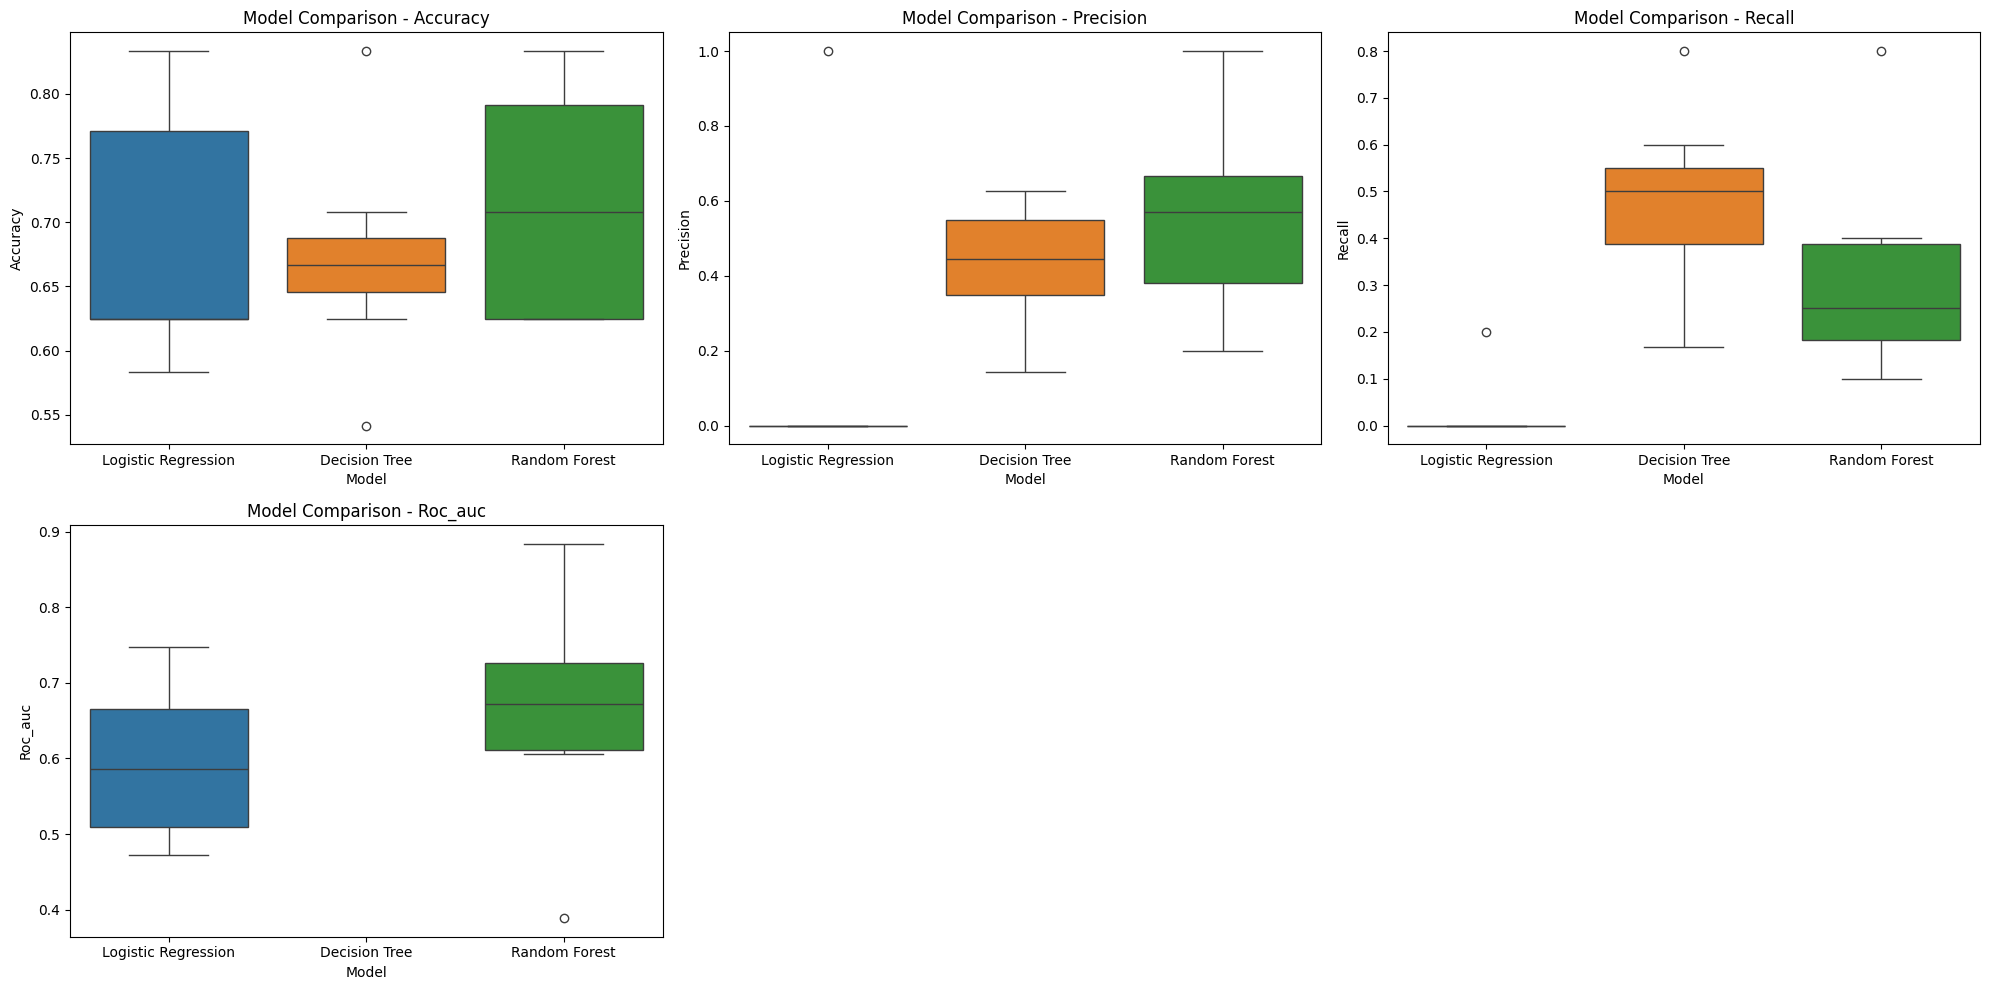

In [30]:

from sklearn.feature_selection import f_oneway

models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestClassifier()
}

def evaluate_model(model, X, y, groups):
    accuracy_list = []
    precision_list = []
    recall_list = []
    f1_list = []
    roc_auc_list = []
    mse_list = []
    
    for train_index, test_index in gkf.split(X, y, groups):
        X_train, X_test = X[train_index], X[test_index]  
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        
        if hasattr(model, 'predict_proba'):
            y_prob = model.predict_proba(X_test)[:, 1]
            roc_auc = roc_auc_score(y_test, y_prob)
        else:
            y_prob = None
            roc_auc = None
        
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        
        accuracy_list.append(accuracy)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)
        roc_auc_list.append(roc_auc)
        mse_list.append(mse)
    
    return {
        "accuracy": accuracy_list,
        "precision": precision_list,
        "recall": recall_list,
        "roc_auc": roc_auc_list,
    }

results = {}
for model_name, model in models.items():
    results[model_name] = evaluate_model(model, X, y, groups)
        
    
metrics = ["accuracy", "precision", "recall", "roc_auc"]
plot_data = {}

for metric in metrics:
    plot_data[metric] = {
        model_name: results[model_name][metric]
        for model_name in models.keys()
    }

plt.figure(figsize=(20, 10))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    metric_data = pd.DataFrame(plot_data[metric])
    sns.boxplot(data=metric_data)
    plt.title(f'Model Comparison - {metric.capitalize()}')
    plt.xlabel('Model')
    plt.ylabel(metric.capitalize())

plt.tight_layout()
plt.show()

